## Assignment week 2

> Note: sometimes your answer doesn't match one of
> the options exactly. That's fine.
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df_housing = pd.read_csv("../data/housing.csv")

### EDA

- Load the data.
- Look at the `median_house_value` variable. Does it have a long tail?


In [103]:
df_housing.shape

(20640, 10)

In [104]:
df_housing.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3955,-118.62,34.20,32.0,3233.0,553.0,1678.0,545.0,5.0025,234900.0,<1H OCEAN
796,-122.08,37.63,31.0,767.0,171.0,548.0,185.0,3.7614,176000.0,NEAR BAY
19734,-122.17,40.20,28.0,1782.0,334.0,873.0,311.0,3.3594,79100.0,INLAND


In [105]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


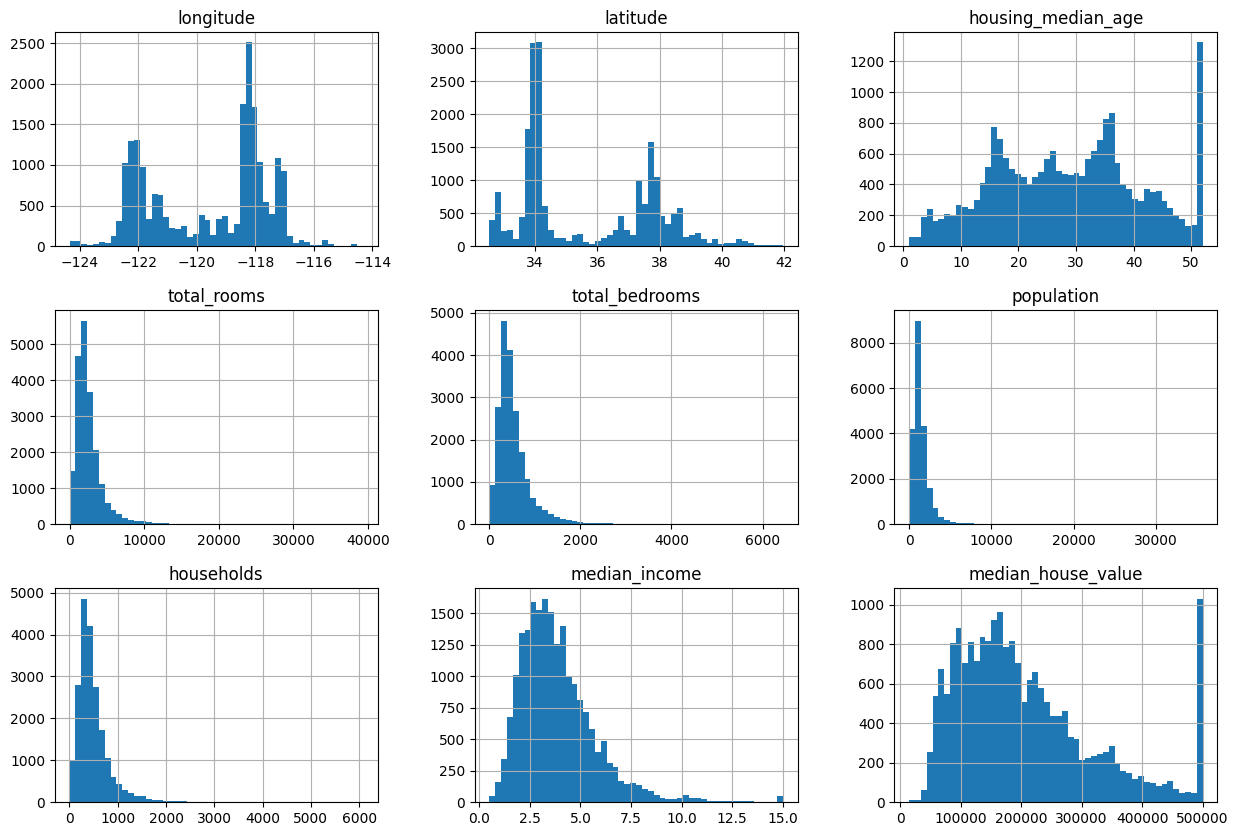

In [106]:
df_housing.hist(bins=50, figsize=(15, 10))
plt.show()

In [107]:
def get_metadata(df: pd.DataFrame) -> None:
    print("Data type:")
    print(df.dtypes)
    print(20 * "--")
    print("Dimensions:")
    print(df.shape)
    print(20 * "--")
    print("Column names:")
    print(df.columns)
    print(20 * "--")
    print("Null values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))


get_metadata(df_housing)

Data type:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
----------------------------------------
Dimensions:
(20640, 10)
----------------------------------------
Column names:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
----------------------------------------
Null values:
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proxim

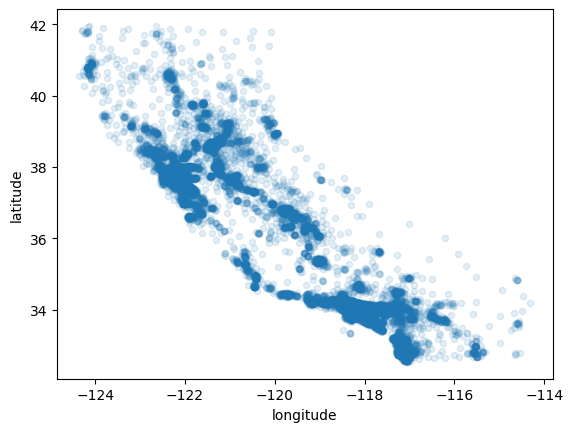

In [108]:
df_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.12)
plt.show()

In [109]:
corr_matrix = df_housing.drop(columns=["ocean_proximity"]).corr(
    method="pearson", numeric_only=False
)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

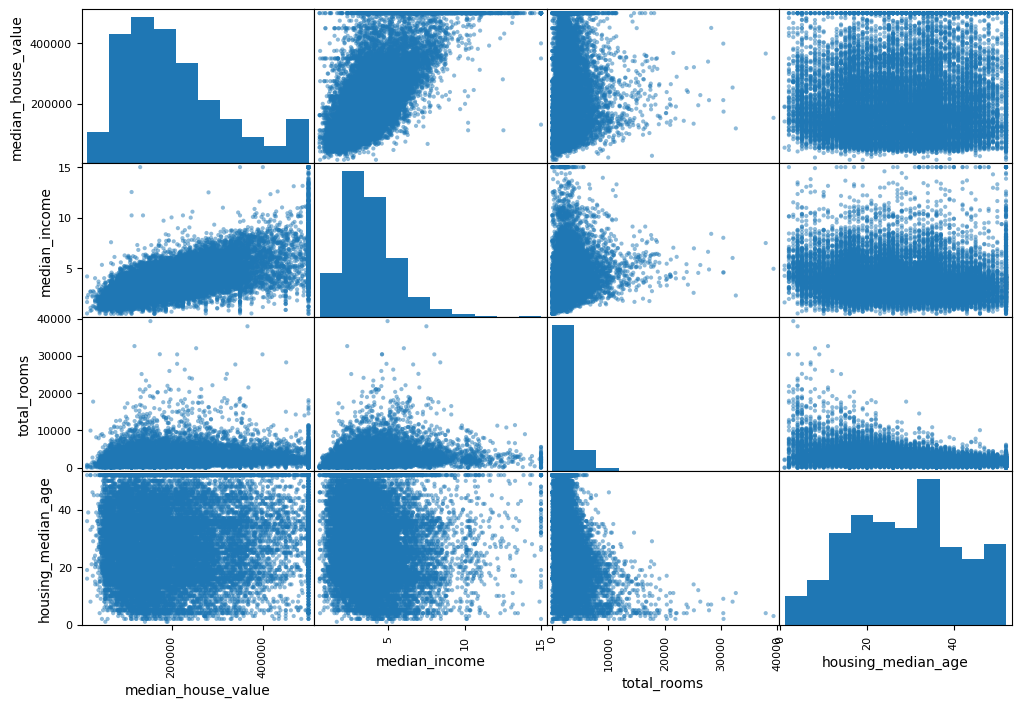

In [110]:
from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age",
]
scatter_matrix(df_housing[attributes], figsize=(12, 8))
plt.show()

### Preparing the dataset

For this homework, we only want to use a subset of data.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

- `'latitude'`,
- `'longitude'`,
- `'housing_median_age'`,
- `'total_rooms'`,
- `'total_bedrooms'`,
- `'population'`,
- `'households'`,
- `'median_income'`,
- `'median_house_value'`


In [111]:
df = df_housing.loc[
    df_housing["ocean_proximity"].isin(["<1H OCEAN", "INLAND"]),
    [
        "latitude",
        "longitude",
        "housing_median_age",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
        "median_income",
        "median_house_value",
    ],
]

In [112]:
df.sample(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
18116,37.30,-122.02,32.0,2134.0,328.0,903.0,322.0,6.3590,341900.0
11106,33.85,-117.90,31.0,3413.0,764.0,2326.0,728.0,4.3250,187100.0
11116,33.84,-117.87,25.0,1928.0,414.0,961.0,385.0,4.0724,231400.0


### Question 1

There's one feature with missing values. What is it?

- `total_rooms`
- `total_bedrooms`
- `population`
- `households`


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [114]:
print(f"Columns with missing values: {df.columns[df.isnull().any()].tolist()}")

Columns with missing values: ['total_bedrooms']


### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295


In [115]:
df["population"].quantile(0.5)

1195.0

In [116]:
print(
    f"The 50th percentile of population is: {df['population'].quantile(0.5)}")

The 50th percentile of population is: 1195.0


### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed `42`.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.


In [203]:
np.random.seed(42)

n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)

In [204]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [205]:
print(
    f"Size of whole dataset: {n}, size of train set: {n_train}, size of validation set: {n_val}, size of test set: {n_test}"
)

Size of whole dataset: 15687, size of train set: 9413, size of validation set: 3137, size of test set: 3137


In [206]:
df_train = df.iloc[idx[:n_train]]
df_train = df_train.reset_index(drop=True)

df_val = df.iloc[idx[n_train: n_train + n_val]]
df_val = df_val.reset_index(drop=True)

df_test = df.iloc[idx[n_train + n_val:]]
df_test = df_test.reset_index(drop=True)

In [207]:
y_train = np.log1p(df_train["median_house_value"].values)
y_val = np.log1p(df_val["median_house_value"].values)
y_test = np.log1p(df_test["median_house_value"].values)

### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)`
- Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


In [208]:
df_train_0 = df_train.copy()
df_val_0 = df_val.copy()
df_test_0 = df_test.copy()


y_train_0 = np.log1p(df_train_0["median_house_value"].values)
df_train_0 = df_train_0.drop(columns=["median_house_value"])
df_train_0["total_bedrooms"] = df_train_0["total_bedrooms"].fillna(0).values
X_train_0 = df_train_0.values


y_val_0 = np.log1p(df_val_0["median_house_value"].values)
df_val_0 = df_val_0.drop(columns=["median_house_value"])
df_val_0["total_bedrooms"] = df_val_0["total_bedrooms"].fillna(0).values
X_val_0 = df_val_0.values


y_test_0 = np.log1p(df_test_0["median_house_value"].values)
df_test_0 = df_test_0.drop(columns=["median_house_value"])
df_test_0["total_bedrooms"] = df_test_0["total_bedrooms"].fillna(0).values
X_test_0 = df_test_0.values

In [209]:
def train_linear_regression(X_train: np.ndarray, y_train: np.ndarray):
    ones = np.ones(X_train.shape[0])
    X = np.column_stack([ones, X_train])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y_train)

    return w_full[0], w_full[1:]


def rmse(y_test: np.ndarray, y_pred: np.ndarray) -> float:
    error = y_test - y_pred
    se = error**2
    mse = se.mean()

    return np.sqrt(mse)

In [210]:
w0, w = train_linear_regression(X_train_0, y_train_0)
# Using validation
y_pred_0 = w0 + X_val_0.dot(w)
rmse(y_val_0, y_pred_0)

0.34084790341656657

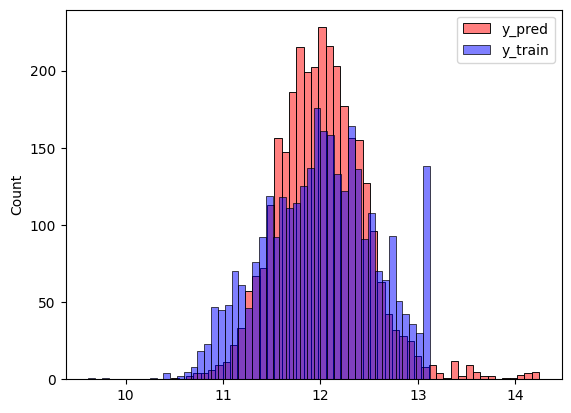

In [211]:
sns.histplot(y_pred_0, color="red", alpha=0.5, bins=50)
sns.histplot(y_val_0, color="blue", alpha=0.5, bins=50)
plt.legend(["y_pred", "y_train"])

plt.show()

## Mean


In [212]:
df_train.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
median_house_value     0
dtype: int64

In [213]:

df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_test_mean = df_test.copy()

print(df_train_mean["total_bedrooms"].isnull().sum())
mean_total_bedrooms = df_train_mean["total_bedrooms"].mean()

y_train_mean = np.log1p(df_train_mean["median_house_value"].values)
df_train_mean = df_train_mean.drop(columns=["median_house_value"])
df_train_mean["total_bedrooms"] = (
    df_train_mean["total_bedrooms"].fillna(mean_total_bedrooms).values
)
X_train_mean = df_train_mean.values


y_val_mean = np.log1p(df_val_mean["median_house_value"].values)
df_val_mean = df_val_mean.drop(columns=["median_house_value"])
df_val_mean["total_bedrooms"] = (
    df_val_mean["total_bedrooms"].fillna(mean_total_bedrooms).values
)
X_val_mean = df_val_mean.values


y_test_mean = np.log1p(df_test_mean["median_house_value"].values)
df_test_mean = df_test_mean.drop(columns=["median_house_value"])
df_test_mean["total_bedrooms"] = (
    df_test_mean["total_bedrooms"].fillna(mean_total_bedrooms).values
)
X_test_mean = df_test_mean.values

94


In [214]:
df_train_mean["total_bedrooms"].isnull().sum()

0

In [215]:
w0, w = train_linear_regression(X_train_mean, y_train_mean)
# Using validation
y_pred_mean = w0 + X_val_mean.dot(w)
rmse(y_val_mean, y_pred_mean)

0.3405699801474657

In [216]:
# Both are equally good

### Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001


In [221]:
def train_linear_regression_regulation(
    X_train: np.ndarray, y_train: np.ndarray, r: float = 0.001
):
    ones = np.ones(X_train.shape[0])
    X = np.column_stack([ones, X_train])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y_train)

    return w_full[0], w_full[1:]

In [222]:
df_train_reg = df_train.copy()
df_val_reg = df_val.copy()
df_test_reg = df_test.copy()


In [223]:
def prepare_X(df:pd.DataFrame) -> np.ndarray:
    df = df.drop(columns=["median_house_value"])
    df["total_bedrooms"] = df["total_bedrooms"].fillna(0).values
    X = df.values
    return X

y_train = np.log1p(df_train_reg["median_house_value"].values)
df_train_reg = df_train_reg.drop(columns=["median_house_value"])
df_train_reg["total_bedrooms"] = df_train_reg["total_bedrooms"].fillna(0).values
X_train = df_train_reg.values


y_val = np.log1p(df_val_reg["median_house_value"].values)
df_val_reg = df_val_reg.drop(columns=["median_house_value"])
df_val_reg["total_bedrooms"] = df_val_reg["total_bedrooms"].fillna(0).values
X_val = df_val_reg.values


y_test = np.log1p(df_test_reg["median_house_value"].values)
df_test_reg = df_test_reg.drop(columns=["median_house_value"])
df_test_reg["total_bedrooms"] = df_test_reg["total_bedrooms"].fillna(0).values
X_test = df_test_reg.values

In [224]:
dict_values = {}
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_regulation(X_train, y_train, r=r)
    
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)
    dict_values[r] = score

0 -9.763249477872478 0.34084790341656657
1e-06 -9.763228830761964 0.3408479061792498
0.0001 -9.761185235634128 0.34084818005421835
0.001 -9.742646249295081 0.34085069218506675
0.01 -9.56105619328998 0.34087793004759326
0.1 -8.058889769412012 0.34128620419960237
1 -3.1331542783180195 0.3448958327642759
5 -0.84108679750481 0.34773980704789115
10 -0.43811723158933275 0.34831498335209765
100 -0.04301171248545425 0.34891577726261563


In [225]:
df_values = pd.DataFrame(dict_values.items(), columns=["r", "score"])

df_values.sort_values(by=["score"])

,r,score
0,0.000000,0.340848
1,0.000001,0.340848
2,0.000100,0.340848
3,0.001000,0.340851
4,0.010000,0.340878
5,0.100000,0.341286
6,1.000000,0.344896
7,5.000000,0.347740
8,10.000000,0.348315
9,100.000000,0.348916


In [99]:
# 0

### Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
- Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different.
> If standard deviation of scores is low, then our model is _stable_.


In [236]:
def prepare_data(df: pd.DataFrame, seed: int):
    n = len(df)

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df.iloc[idx[:n_train]]
    df_train = df_train.reset_index(drop=True)
    y_train = np.log1p(df_train["median_house_value"].values)
    X_train = df_train.drop(columns=["median_house_value"])
    X_train = X_train.fillna(0)
    X_train = X_train.values




    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_val = df_val.reset_index(drop=True)
    y_val = np.log1p(df_val["median_house_value"].values)
    X_val = df_val.drop(columns=["median_house_value"])
    X_val = X_val.fillna(0)
    X_val = X_val.values


    df_test = df.iloc[idx[n_train + n_val:]]
    df_test = df_test.reset_index(drop=True)
    y_test = np.log1p(df_test["median_house_value"].values)
    X_test = df_test.drop(columns=["median_house_value"])
    X_test = X_test.fillna(0)
    X_test = X_test.values
    
    return X_train, X_val, X_test, y_train, y_val, y_test

def train_and_pred(df: pd.DataFrame, seed: int):
    r=0
    X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(df, seed)
    
    w0, w = train_linear_regression_regulation(X_train, y_train, r=r)

#    y_pred = w0 + X_val.dot(w)
    y_pred = w0 + X_test.dot(w)
#    score = rmse(y_val, y_pred)
    score = rmse(y_test, y_pred)


    print(r, seed, w0, score)
    return score

In [240]:
df_housing_filtered = df.copy()

dict_values = {}
for seed in range(10):
    dict_values[seed] = train_and_pred(df_housing_filtered, seed)

0 0 -9.87006897148552 0.35515595188467364
0 1 -9.114011209478683 0.35200392926522994
0 2 -9.911560201405122 0.3332854875458065
0 3 -10.233183681940078 0.3368445253041406
0 4 -9.1747634505935 0.3492991471535929
0 5 -10.006648303263274 0.33429469807857976
0 6 -10.039903099139199 0.343147334659999
0 7 -10.35354544522589 0.34278858266378254
0 8 -9.899416167009921 0.33752314765405467
0 9 -9.96462212626483 0.3348843533702416


In [241]:
df_values = pd.DataFrame(dict_values.items(), columns=["seed", "score"])

In [242]:
round(np.std(df_values["score"]), 3)

0.007

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with `r=0.001`.
- What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43


In [246]:
def train_val_and_pred(df: pd.DataFrame, seed: int):
    r=0.001
    X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(df, seed)

    X_full = np.vstack([X_train, X_val])
    y_full = np.vstack([y_train, y_val])

    w0, w = train_linear_regression_regulation(X_full, y_full, r=r)

    y_pred = w0 + X_test.dot(w)
    score = rmse(y_test, y_pred)
    
    return score

In [247]:
df_housing_filtered = df.copy()

train_and_pred(df_housing_filtered, seed=9)

0 9 -9.96462212626483 0.3348843533702416


0.3348843533702416